# IMPORT THƯ VIỆN


In [52]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pathlib import Path
import os
import pandas as pd
import seaborn as sns


# ĐỌC DỮ LIỆU


In [53]:
col_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'num'
]

DATA = pd.read_csv(
    'Data/processed.cleveland.csv',
	encoding = 'latin1',
    names = col_names,
    header = None,
)

DATA.replace('?', pd.NA, inplace=True)

DATA['num'] = DATA['num'].apply(lambda x: 1 if x>0 else 0)

DATA


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Thống kê mô tả các đặc trưng số liệu

In [54]:
DATA.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [55]:
print(DATA.columns.values)


['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'num']


**Mô tả biến**
- `age`: Tuổi (năm)
- `sex`: Giới tính bệnh nhân
- `cp`: Loại đau ngực
- `trestbps`: Huyết áp khi nghỉ (mmHg)
- `chol`: Lượng cholesterol trong huyết thanh (mg/dl)
- `fbs`: Đường huyết lúc đói > 120 mg/dl (1 = có; 0 = không)
- `restecg`: Kết quả điện tâm đồ khi nghỉ
- `thalach`: Nhịp tim tối đa đạt được
- `exang`: Đau thắt ngực do gắng sức (1 = có; 0 = không)
- `oldpeak`: Mức chênh ST do gắng sức so với lúc nghỉ
- `slope`: Độ dốc đoạn ST khi gắng sức
- `ca`: Số mạch máu lớn được nhuộm (0–3)
- `thal`: 3 = bình thường; 6 = tổn thương cố định; 7 = tổn thương hồi phục
- `num`: Chẩn đoán bệnh tim (giá trị mục tiêu)



**Phân loại biến**
- **Biến phân loại (Categorical):**  
  `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`

- **Biến số (Numeric):**  
  `age`, `trestbps`, `chol`, `thalach`, `oldpeak`, `num`


# Kiểm tra dữ liệu thiếu và ngoại lai


In [56]:
print("Missing Values per Column:")
print(DATA.isnull().sum())
print("------------------------------------")
print("Infinity Values per Column:")
print((DATA == np.inf).sum() + (DATA == -np.inf).sum())


Missing Values per Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
------------------------------------
Infinity Values per Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


### Nhận xét về dữ liệu thiếu và giá trị vô cực

- Một số cột có giá trị thiếu, cụ thể là `ca` (4 giá trị) và `thal` (2 giá trị), nhưng tỷ lệ thiếu không lớn.
- Không có giá trị vô cực trong bất kỳ cột nào.
- Tùy vào mục đích phân tích, có thể:
  - Xoá các dòng chứa giá trị thiếu, hoặc
  - Điền giá trị thay thế bằng các phương pháp như trung vị, mode, hoặc mô hình dự đoán.


In [57]:
df_clean = DATA.dropna()
df_clean


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


# Trực quan hóa mối quan hệ giữa các biến số

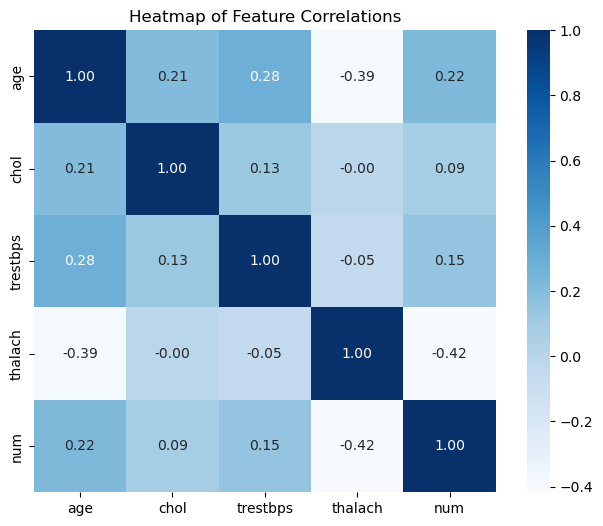

In [59]:
selected_columns = ['age', 'chol', 'trestbps','thalach','num']
corr = DATA[selected_columns].corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title('Heatmap of Feature Correlations')
plt.show()


# CÁC BIẾN PHÂN LOẠI


In [60]:
import matplotlib.pyplot as plt
def histogram(variable):
    """
    input: variable ex:"Age"
    output: histogram & value count
    """
    # get feature
    var = DATA[variable]

    # count number of continuous variable
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize=(8,3))
    plt.hist(var, bins=20, color='blue', alpha=0.7)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

    print("{}: \n{}".format(variable, varValue))

def bar_plot(variable):
    """
    input: variable ex:"Sex"
    output: bar plot & value count
    """
    # get feature
    var = DATA[variable]

    # count number of categorical variable
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize=(8,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

    print("{}: \n{}".format(variable, varValue))


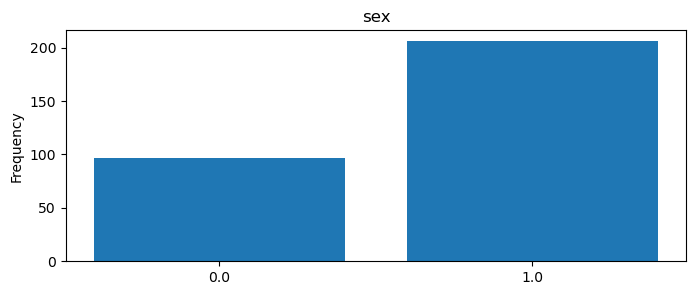

sex: 
sex
1.0    206
0.0     97
Name: count, dtype: int64


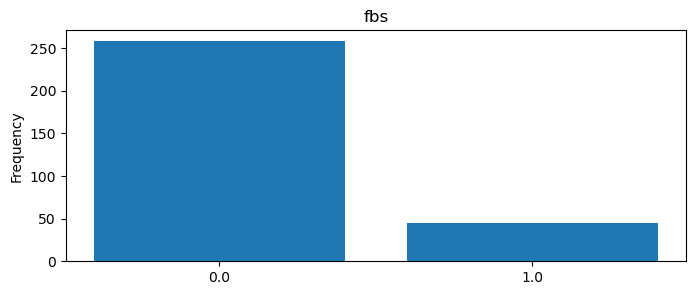

fbs: 
fbs
0.0    258
1.0     45
Name: count, dtype: int64


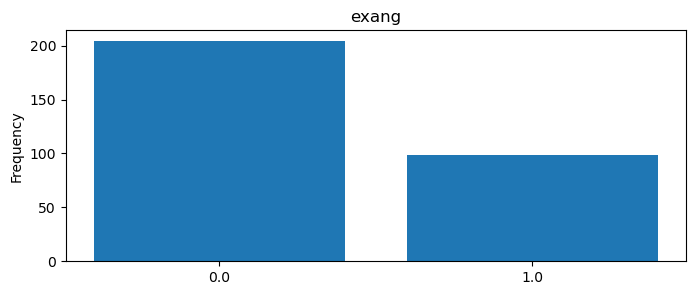

exang: 
exang
0.0    204
1.0     99
Name: count, dtype: int64


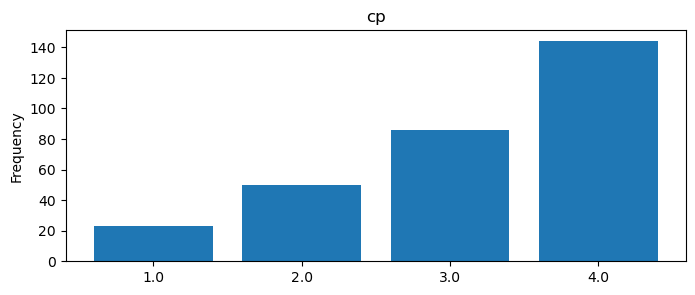

cp: 
cp
4.0    144
3.0     86
2.0     50
1.0     23
Name: count, dtype: int64


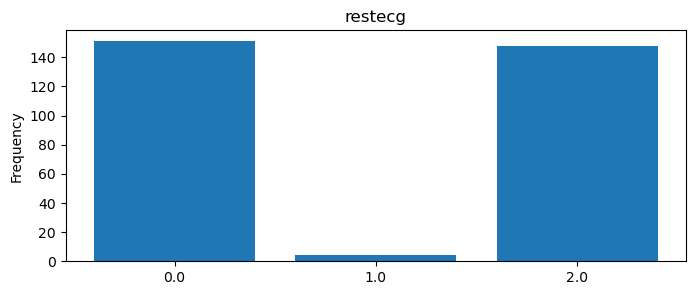

restecg: 
restecg
0.0    151
2.0    148
1.0      4
Name: count, dtype: int64


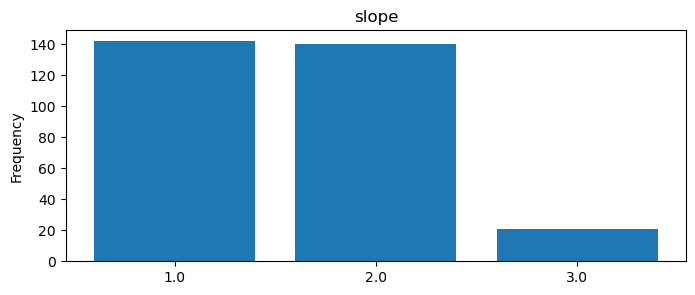

slope: 
slope
1.0    142
2.0    140
3.0     21
Name: count, dtype: int64


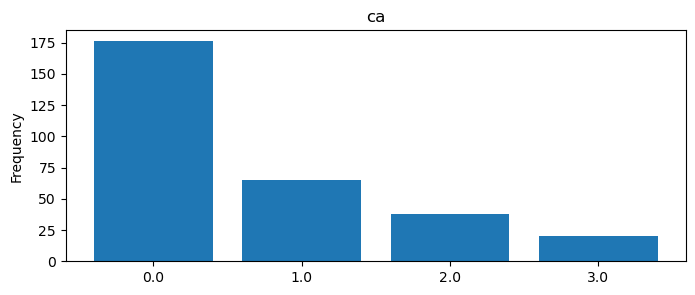

ca: 
ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64


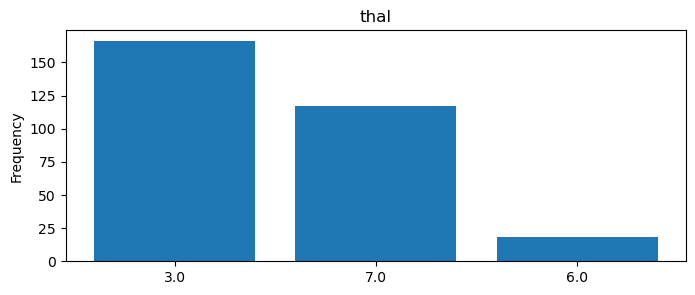

thal: 
thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64


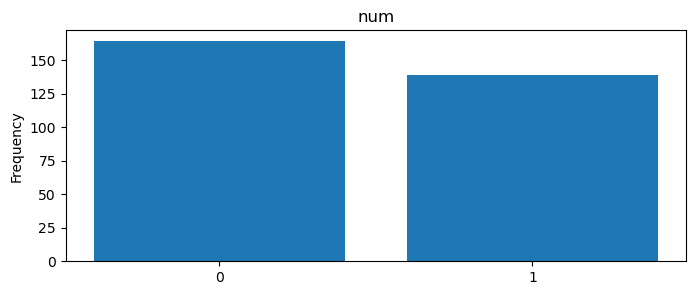

num: 
num
0    164
1    139
Name: count, dtype: int64


In [61]:
category1=['sex', 'fbs', 'exang','cp','restecg', 'slope', 'ca', 'thal', 'num']
for c in category1:
    bar_plot(c)


# CÁC BIẾN SỐ TÍNH


In [62]:
def plot_hist(variable):
    plt.figure(figsize=(8,3))
    plt.hist(DATA[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribituon with hist".format(variable))
    plt.show()


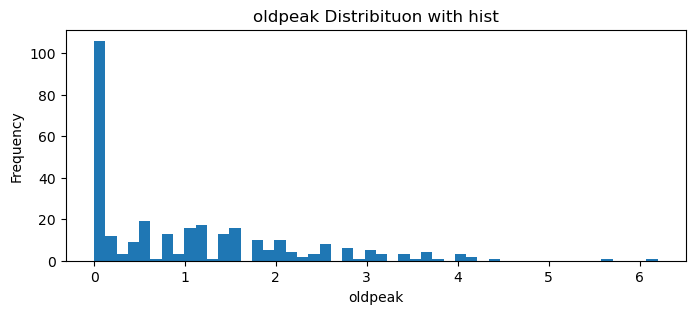

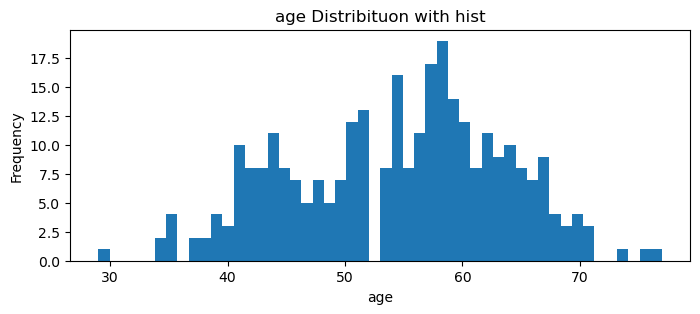

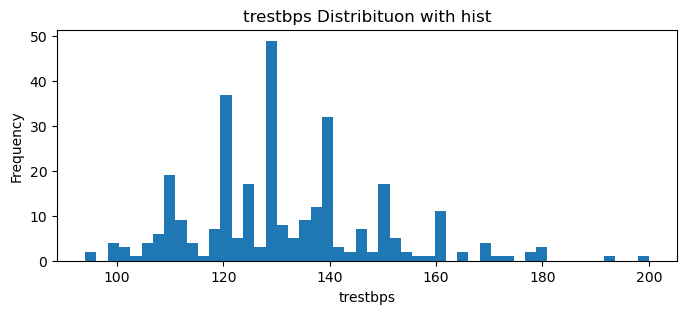

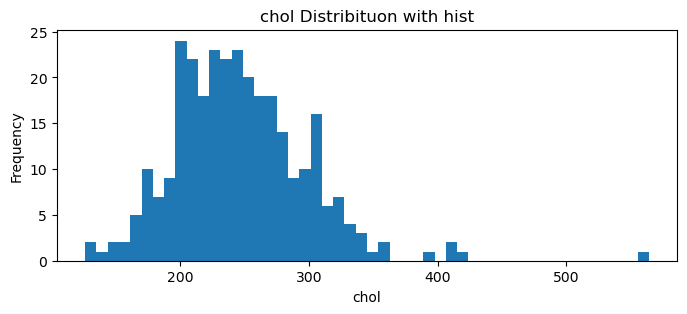

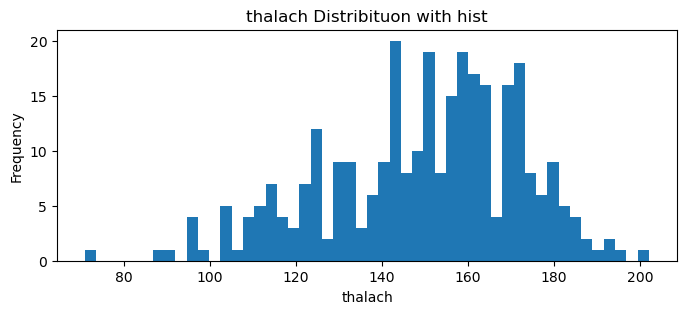

In [63]:
numericVar=['oldpeak', 'age', 'trestbps', 'chol', 'thalach']
for n in numericVar:
    plot_hist(n)


# PHÂN TÍCH DỮ LIỆU CƠ BẢN

In [64]:
DATA[["sex","num"]]


,sex,num
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,0
4,0.0,0
...,...,...
298,1.0,1
299,1.0,1
300,1.0,1
301,0.0,1


In [65]:
DATA[["exang","num"]].groupby(["exang"],as_index = False).mean().sort_values(by='num', ascending=False)


,exang,num
1,1.0,0.767677
0,0.0,0.308824


In [66]:
DATA[["cp","num"]].groupby(["cp"],as_index = False).mean().sort_values(by='num', ascending=False)


,cp,num
3,4.0,0.729167
0,1.0,0.304348
2,3.0,0.209302
1,2.0,0.180000


In [67]:
DATA[["restecg","num"]].groupby(["restecg"],as_index = False).mean().sort_values(by='num', ascending=False)


,restecg,num
1,1.0,0.750000
2,2.0,0.540541
0,0.0,0.370861


In [68]:
DATA[["slope","num"]].groupby(["slope"],as_index = False).mean().sort_values(by='num', ascending=False)


,slope,num
1,2.0,0.650000
2,3.0,0.571429
0,1.0,0.253521


In [69]:
DATA[["ca","num"]].groupby(["ca"],as_index = False).mean().sort_values(by='num', ascending=False)


,ca,num
3,3.0,0.850000
2,2.0,0.815789
1,1.0,0.676923
0,0.0,0.261364


In [70]:
DATA[["sex","num"]].groupby(["sex"],as_index = False).mean().sort_values(by='num', ascending=False)


,sex,num
1,1.0,0.553398
0,0.0,0.257732


# PHÂN LOẠI BỆNH TIM BẰNG CÂY QUYẾT ĐỊNH

## Từ Phân Tích Khám Phá Dữ Liệu (EDA) đến Mô Hình Phân Loại

Một số điểm chính:

- **Dữ liệu thiếu**: Bộ dữ liệu có các giá trị thiếu ở hai cột `ca` và `thal`, cần được xử lý trước khi xây dựng mô hình.

- **Tương quan giữa các đặc trưng**: Biểu đồ nhiệt (*heatmap*) cho thấy có mối quan hệ giữa các đặc trưng như `tuổi`, `cholesterol` và biến mục tiêu.

- **Phân phối dữ liệu**: Chúng tôi đã phân tích các đặc trưng phân loại và đặc trưng số để hiểu rõ hơn về phân phối của chúng.

- **Tầm quan trọng của đặc trưng**: Một số đặc trưng như `sex`, `exang`, và `cp` thể hiện mối tương quan mạnh với bệnh tim.



# Nhập các thư viện phân loại 

In [71]:
import pandas as pd
import graphviz
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display, Markdown, Image
from IPython.display import Markdown, display as ds
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


# ĐỌC DỮ LIỆU VÀ TIỀN XỬ LÝ CHO PHÂN LOẠI

## Chuẩn bị dữ liệu dựa trên các phát hiện từ EDA


In [72]:
col_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'num'
]

df = pd.read_csv(
    r'Data/processed.cleveland.csv',
	encoding = 'latin1',
    names = col_names,
    header = None,
    na_values = '?'
)

y = df['num'].apply(lambda x: 1 if x > 0 else 0)
X = df.drop('num', axis = 1)

df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# TRAIN SPLIT TEST


In [73]:
df.dropna(
    subset=[
        'age','sex','cp','trestbps','chol','fbs',
        'restecg','thalach','exang','oldpeak','slope','ca','thal'
    ],
    inplace=True
)

df['num'] = df['num'].apply(lambda x: 1 if x>0 else 0)

df = pd.get_dummies(
    df,
    columns=['sex','cp','restecg','slope','thal'],
    drop_first=True
)

df


,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,sex_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,True,False,False,False,False,True,False,True,True,False
1,67.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1,True,False,False,True,False,True,True,False,False,False
2,67.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,True,False,False,True,False,True,True,False,False,True
3,37.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,True,False,True,False,False,False,False,True,False,False
4,41.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,1,False,False,False,True,False,False,True,False,False,True
298,45.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,True,False,False,False,False,False,True,False,False,True
299,68.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,1,True,False,False,True,False,False,True,False,False,True
300,57.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,1,True,False,False,True,False,False,True,False,False,True


In [74]:
ratios = [
    (0.4, 0.6),
    (0.6, 0.4),
    (0.8, 0.2),
    (0.9, 0.1),
]

subsets = {}

for tr, te in ratios:
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, 
        train_size = tr, 
        stratify = y, 
        random_state = 42
    )
    key = f'{int(tr * 100)}/{int(te * 100)}'
    subsets[key] = {
        'X_train': X_tr, 'y_train': y_tr,
        'X_test' : X_te, 'y_test' : y_te,
    }

print("Finish to create subsets:", list(subsets.keys()))


Finish to create subsets: ['40/60', '60/40', '80/20', '90/10']


# TRAIN MODEL


In [75]:
clf_dict = {}

# Train models for different train/test splits
for key in ['40/60', '60/40', '80/20', '90/10']:
    data = subsets[key]
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(data['X_train'], data['y_train'])
    clf_dict[key] = clf
    print(f"Trained model for split {key}")


Trained model for split 40/60
Trained model for split 60/40
Trained model for split 80/20
Trained model for split 90/10


### Huấn luyện mô hình với các tỷ lệ tập train/test khác nhau

- Đoạn mã huấn luyện mô hình **Decision Tree** với các tỷ lệ chia dữ liệu: `40/60`, `60/40`, `80/20`, `90/10`.
- Mỗi mô hình được huấn luyện bằng thuật toán **ID3** (`criterion='entropy'`).
- Các mô hình được lưu vào biến `clf_dict` để sử dụng sau.
- Mục tiêu: So sánh hiệu suất mô hình khi thay đổi tỷ lệ dữ liệu huấn luyện và kiểm tra.


# TRAIN/TEST SPLIT DISTRIBUTION ANALYSIS


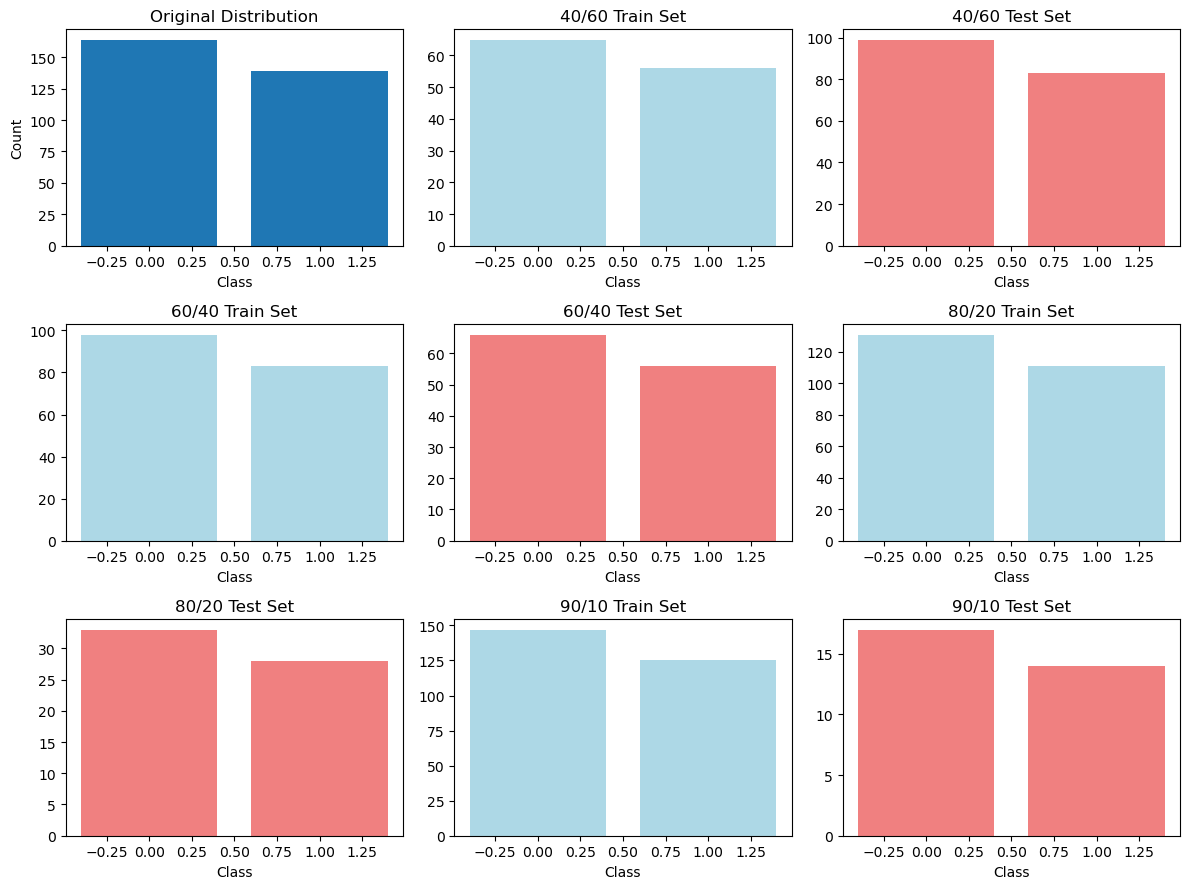

In [76]:
def plot_all_distributions(y, subsets):
    n_plots = 1 + len(subsets)*2   # 1 original + mỗi split 2 (train & test)
    cols = 3
    rows = (n_plots + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = axes.flatten()

    # 1) Original
    cnt = y.value_counts().sort_index()
    axes[0].bar(cnt.index, cnt.values)
    axes[0].set_title('Original Distribution')
    axes[0].set_xlabel('Class'); axes[0].set_ylabel('Count')

    # 2) Train & Test cho từng tỷ lệ
    idx = 1
    for key, data in subsets.items():
        # train
        cnt = data['y_train'].value_counts().sort_index()
        axes[idx].bar(cnt.index, cnt.values, color='lightblue')
        axes[idx].set_title(f'{key} Train Set')
        axes[idx].set_xlabel('Class')
        idx += 1
        # test
        cnt = data['y_test'].value_counts().sort_index()
        axes[idx].bar(cnt.index, cnt.values, color='lightcoral')
        axes[idx].set_title(f'{key} Test Set')
        axes[idx].set_xlabel('Class')
        idx += 1

    # Tắt các subplot thừa
    for ax in axes[idx:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Gọi hàm để visualize
plot_all_distributions(y, subsets)


# Trực quan hóa cây quyết định

In [77]:
def visualize_tree_for_key(key):
    clf = clf_dict[key]
    X_test = subsets[key]['X_test']
    y_test = subsets[key]['y_test']
    y_pred = clf.predict(X_test)

    report = classification_report(y_test, y_pred, target_names=['No Disease', 'Disease'])
    cm = confusion_matrix(y_test, y_pred)
    max_depth = clf.get_depth()

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].axis('off')
    axes[0].text(0, 0.7, report, fontsize=10, verticalalignment='top', fontfamily='monospace')

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
    disp.plot(ax=axes[1], cmap='Blues', values_format='d')
    for txt in axes[1].texts:
        txt.set_fontsize(8)
    axes[1].tick_params(axis='both', labelsize=10)
    axes[1].set_title(f"Confusion Matrix\n(Depth = {max_depth}, Split = {key})", fontsize=10)
    plt.subplots_adjust(wspace=1)
    plt.show()

    plt.figure(figsize=(15, 10))
    plot_tree(clf,
              feature_names=X_test.columns.tolist(),
              class_names=['No Disease', 'Disease'],
              filled=True, rounded=True,
              max_depth=3)
    plt.title(f"Decision Tree Visualization ({key}) - Depth Limited to 3")
    plt.show()


## Cây quyết định cho tập huấn luyện 1

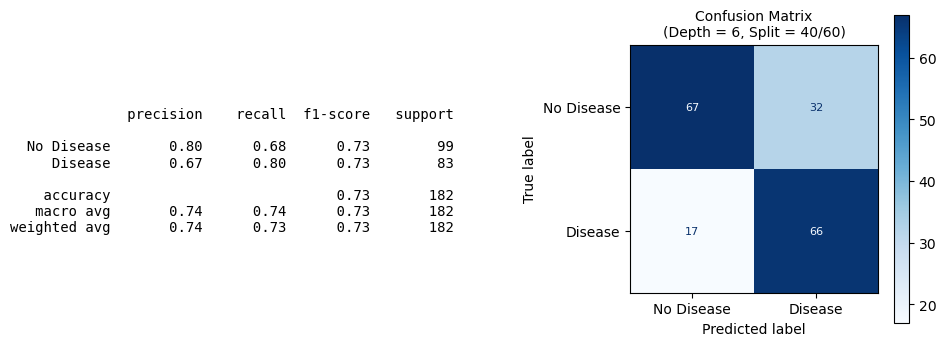

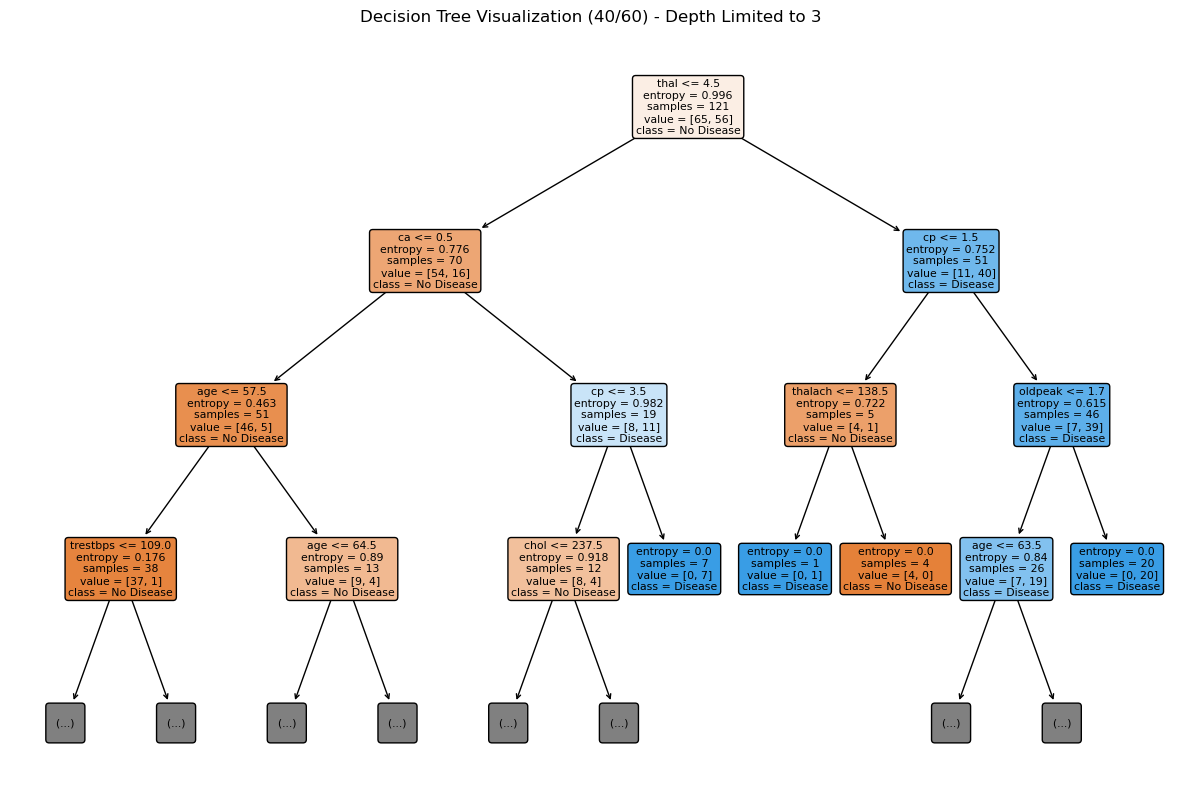

In [78]:
visualize_tree_for_key('40/60')

## Nhận xét Decision Tree cho Split 40/60

### Hiệu suất tổng quan
- **Accuracy**: 73% → Khá tốt với **tập huấn luyện nhỏ (40%)**.
- **Hiệu suất cân bằng**: `F1-score = 0.73` cho **cả hai lớp** (`No Disease` và `Disease`).

### Phân tích chi tiết

#### Classification Metrics & Confusion Matrix Insights
- **True Positives**: 66/83 (**79.5%**) → Mô hình phát hiện bệnh tốt.
- **True Negatives**: 67/99 (**67.7%**) → Nhận diện người khỏe mạnh **khá chính xác**.
- **False Negatives**: 17 ca → **Đáng lưu ý** trong ứng dụng y tế vì bỏ sót người mắc bệnh.



## Cây quyết định cho tập huấn luyện 2

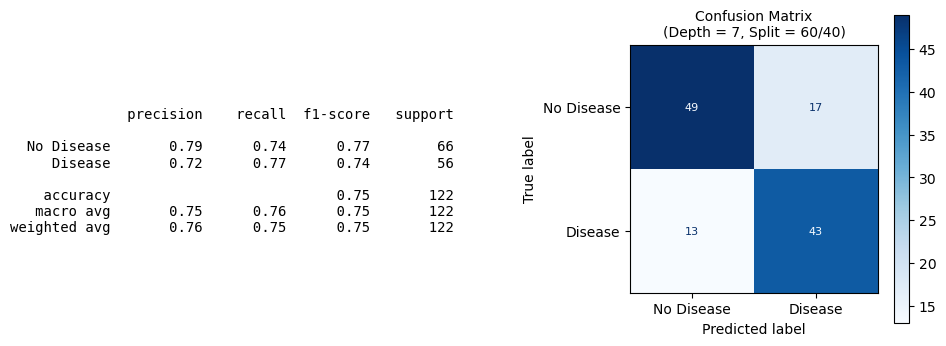

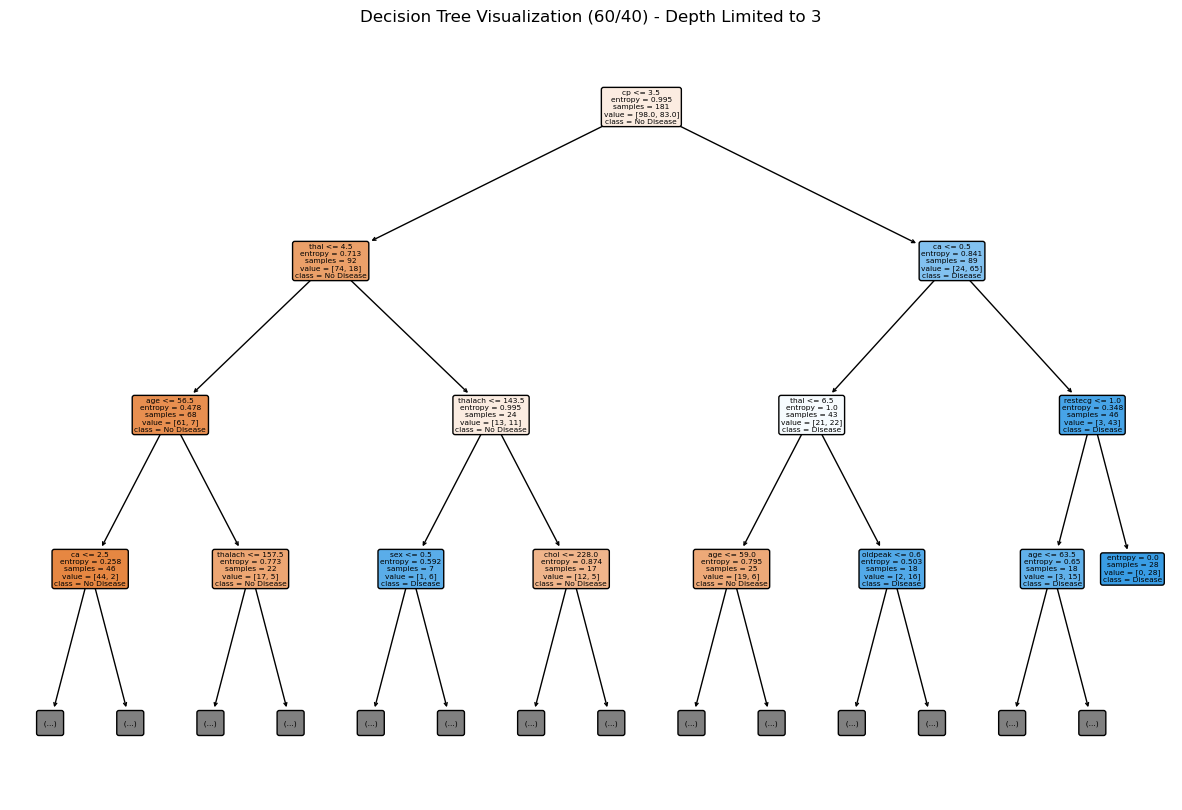

In [79]:
visualize_tree_for_key('60/40')

## Nhận xét Decision Tree cho Split 60/40

### Hiệu suất tổng quan
- **Accuracy**: 75% → Cải thiện rõ rệt so với **split 40/60**.
- **Hiệu suất cân bằng**: `F1-score = 0.75` cho **cả hai lớp** (`No Disease` và `Disease`).

### Phân tích chi tiết

#### Classification Metrics & Confusion Matrix Insights
- **True Positives**: 43/56 (**76.8%**) → Nhận diện bệnh khá tốt.
- **True Negatives**: 49/66 (**74.2%**) → Nhận diện người khỏe mạnh **chính xác hơn**.
- **False Negatives**: 13 ca → **Giảm** so với 40/60 (từ 17 xuống 13).
- **False Positives**: 17 ca → **Tương đương** split trước.


## Cây quyết định cho tập huấn luyện 3

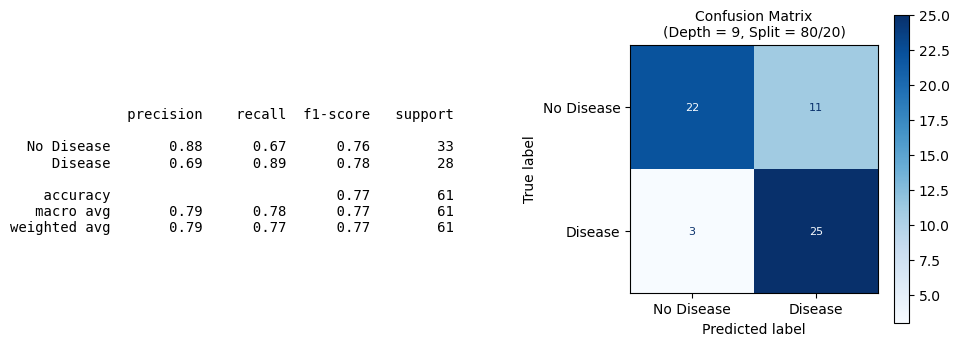

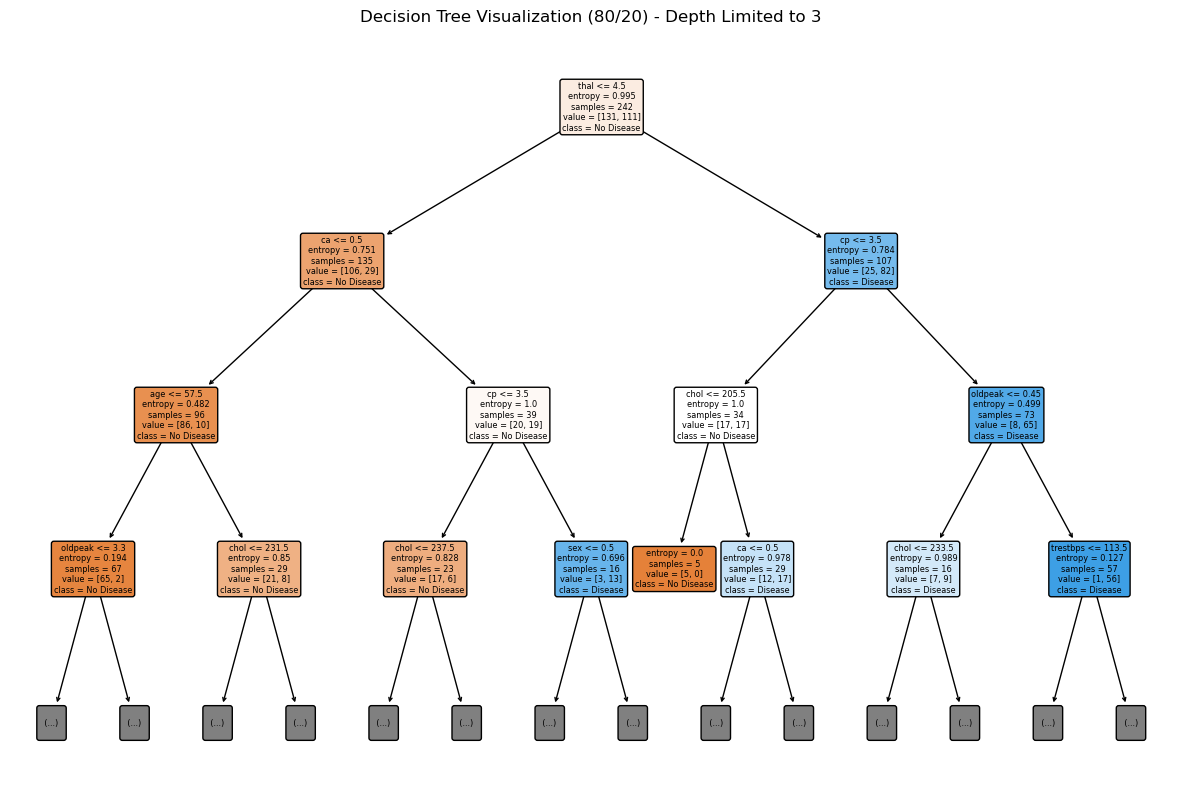

In [80]:
visualize_tree_for_key('80/20')

## Nhận xét Decision Tree cho Split 80/20

### Hiệu suất tổng quan
- **Accuracy**: 77% – Cao nhất trong các tỷ lệ đã thử.
- **F1-score**: 0.77 đều cho cả hai lớp → hiệu suất cân bằng tốt.


### Phân tích chi tiết

#### Classification Metrics & Confusion Matrix Insights
- **True Positives**: 26/29 (**89.7%**) → Mô hình phát hiện bệnh rất tốt.
- **True Negatives**: 22/33 (**66.7%**) → Nhận diện người khỏe ở mức khá.
- **False Negatives**: 3 ca → Thấp nhất trong các splits.
- **False Positives**: 11 ca → Cần cải thiện.



## Cây quyết định cho tập huấn luyện 4

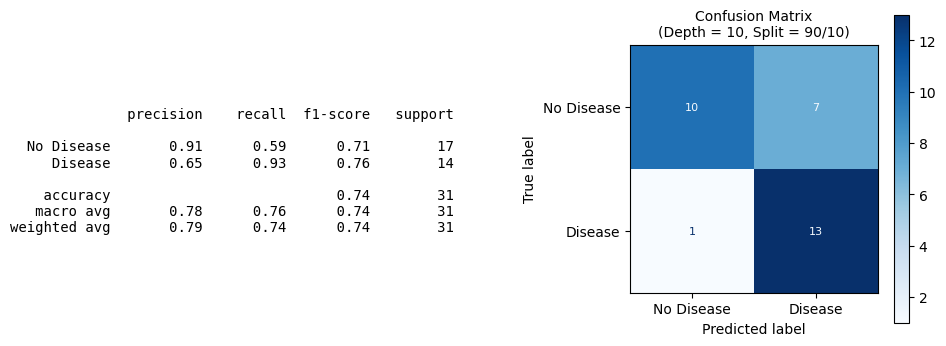

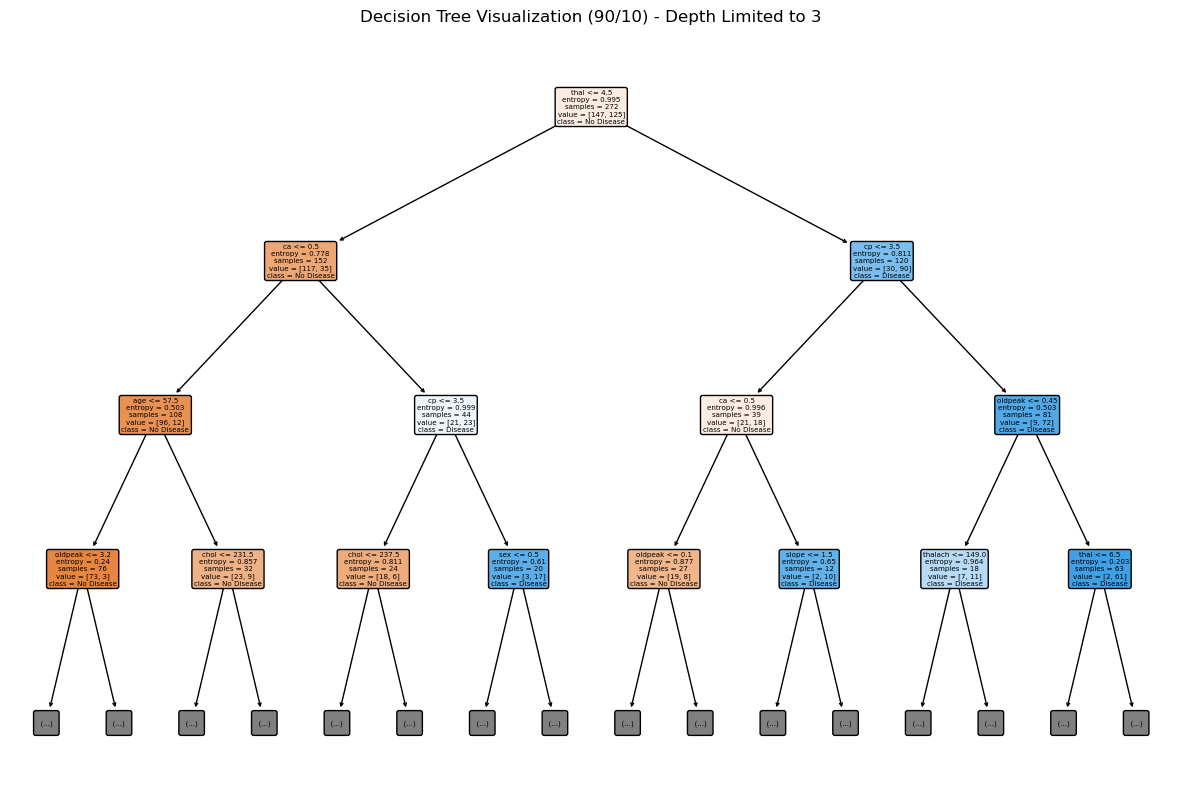

In [81]:
visualize_tree_for_key('90/10')

## Nhận xét Decision Tree cho Split 90/10

### Hiệu suất tổng quan
- **Accuracy**: 74% – thấp hơn split 80/20 dù nhiều dữ liệu huấn luyện hơn.
- **F1-score**: 0.74 – khá cân bằng nhưng không vượt trội.


### Phân tích chi tiết

#### Classification Metrics & Confusion Matrix Insights
- **True Positives**: 13/14 (**92.9%**) → Phát hiện bệnh rất tốt.
- **True Negatives**: 10/17 (**58.8%**) → Khả năng nhận diện người khỏe **thấp hơn**.
- **False Negatives**: 1 ca → Rất thấp, phù hợp với ứng dụng y tế.
- **False Positives**: 7 ca → Gây nhầm lẫn đối với người không mắc bệnh.


# Tổng hợp các chỉ số đánh giá mô hình

In [82]:
# Evaluate all models
for key, clf in clf_dict.items():
    data = subsets[key]
    y_pred = clf.predict(data['X_test'])
    y_true = data['y_test']
    
    accuracy = accuracy_score(y_true, y_pred)
    misclassified_count = (y_pred != y_true).sum()
    total_samples = len(y_true)
    misclassified_rate = 100 * misclassified_count / total_samples
    
    print(f"=== Split {key} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
    print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")
    print()


=== Split 40/60 ===
Accuracy: 0.7308
Numbers of Wrong labels: 49/182
Ratio of wrong labels: 26.92%

=== Split 60/40 ===
Accuracy: 0.7541
Numbers of Wrong labels: 30/122
Ratio of wrong labels: 24.59%

=== Split 80/20 ===
Accuracy: 0.7705
Numbers of Wrong labels: 14/61
Ratio of wrong labels: 22.95%

=== Split 90/10 ===
Accuracy: 0.7419
Numbers of Wrong labels: 8/31
Ratio of wrong labels: 25.81%



#  So sánh hiệu suất mô hình theo độ sâu của cây (max_depth)



=== Decision Tree - Depth none ===


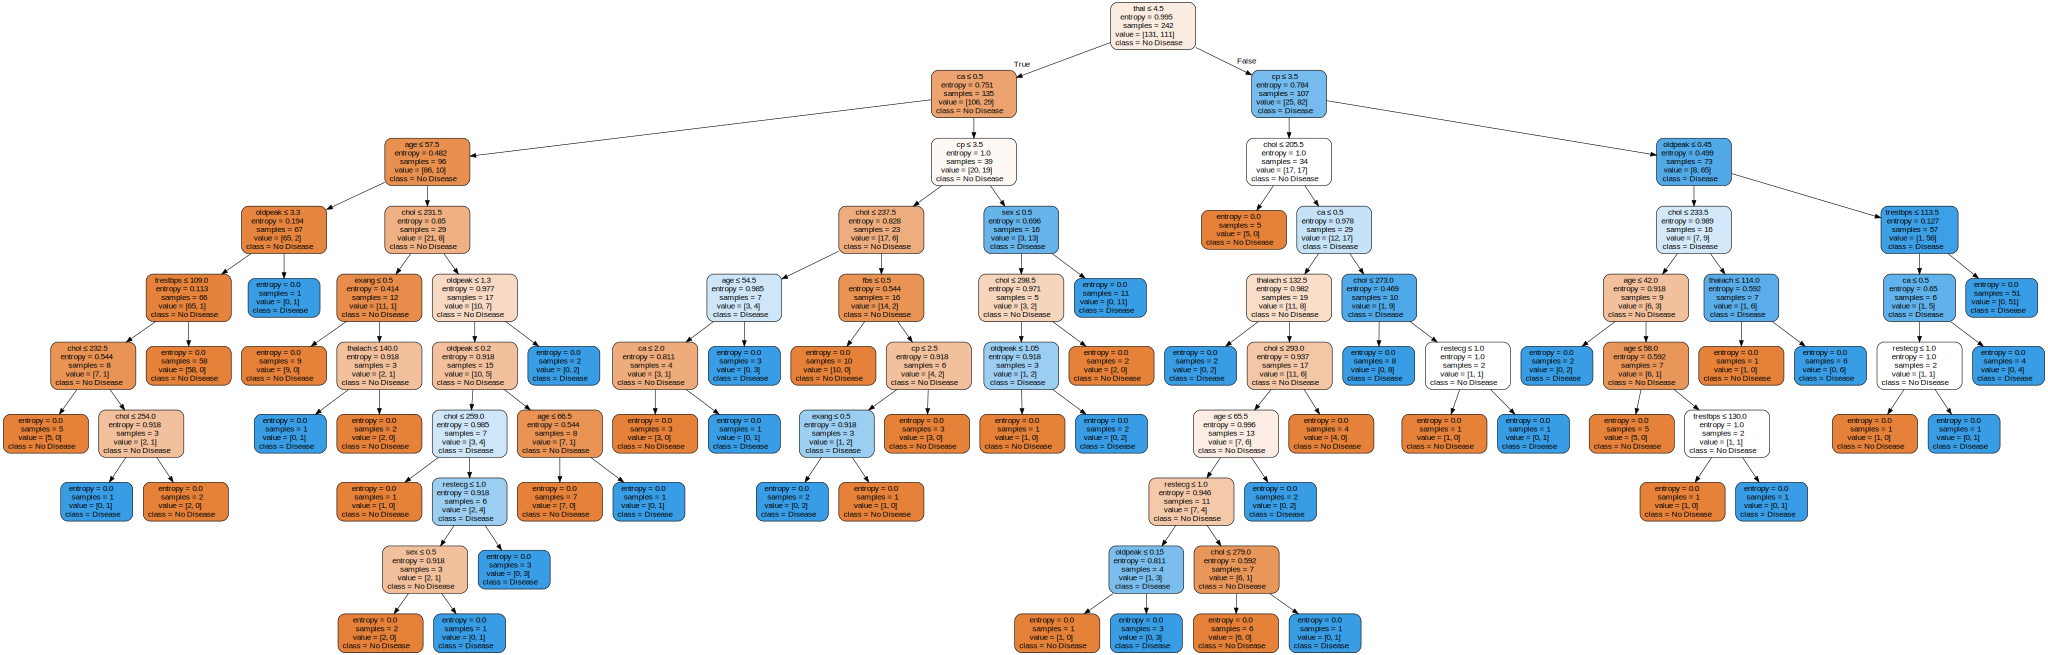

Max depth = None, Accuracy = 0.7705

=== Decision Tree - Depth 2 ===


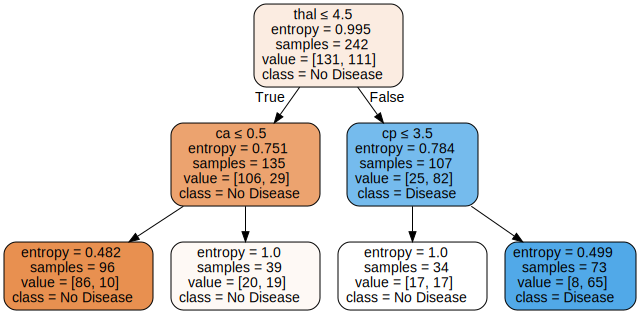

Max depth = 2, Accuracy = 0.7705

=== Decision Tree - Depth 3 ===


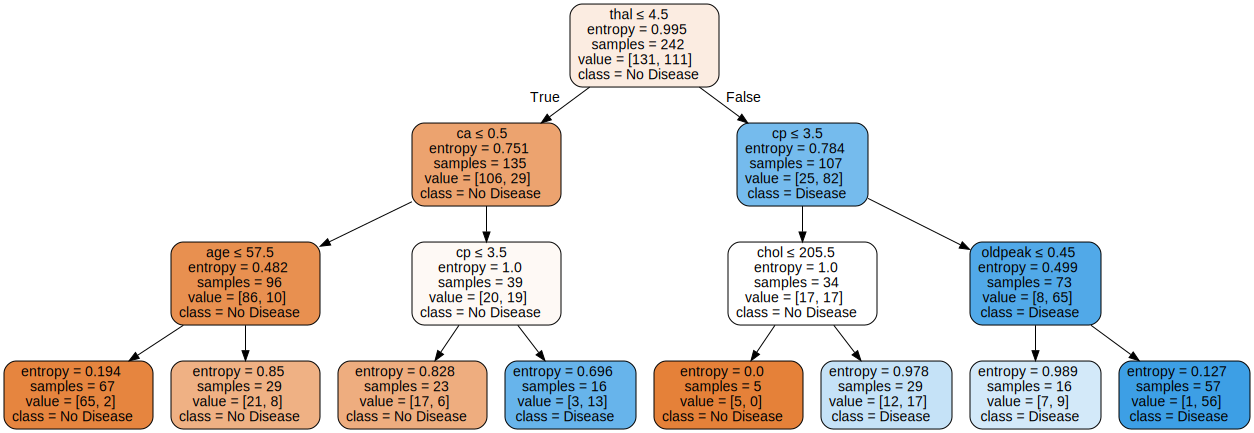

Max depth = 3, Accuracy = 0.7869

=== Decision Tree - Depth 4 ===


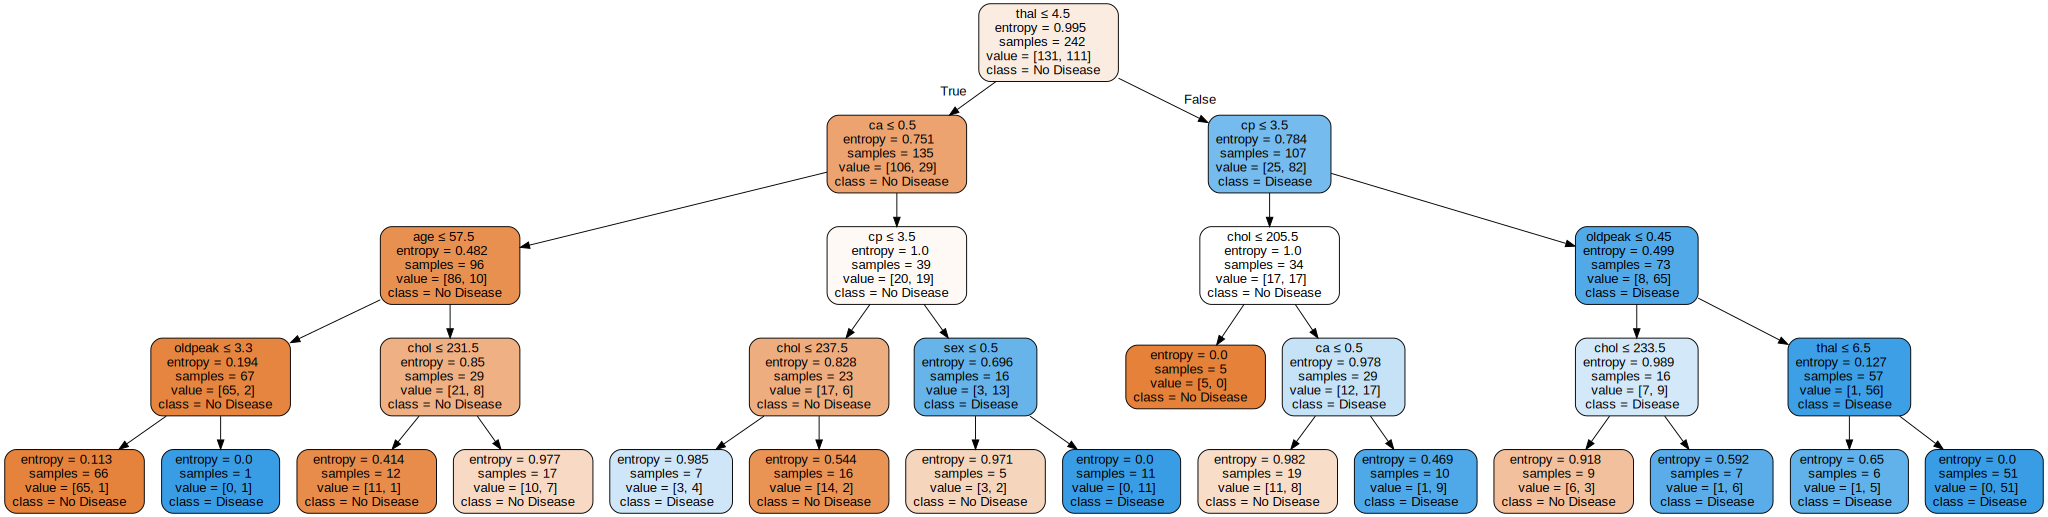

Max depth = 4, Accuracy = 0.7869

=== Decision Tree - Depth 5 ===


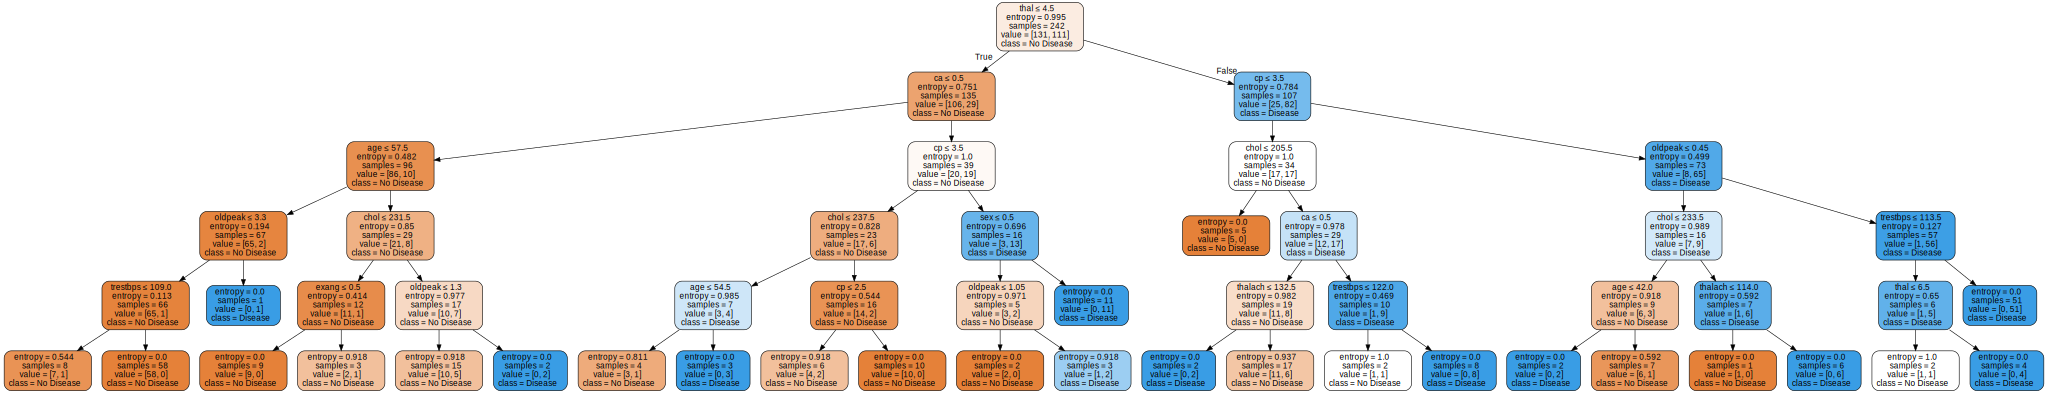

Max depth = 5, Accuracy = 0.8033

=== Decision Tree - Depth 6 ===


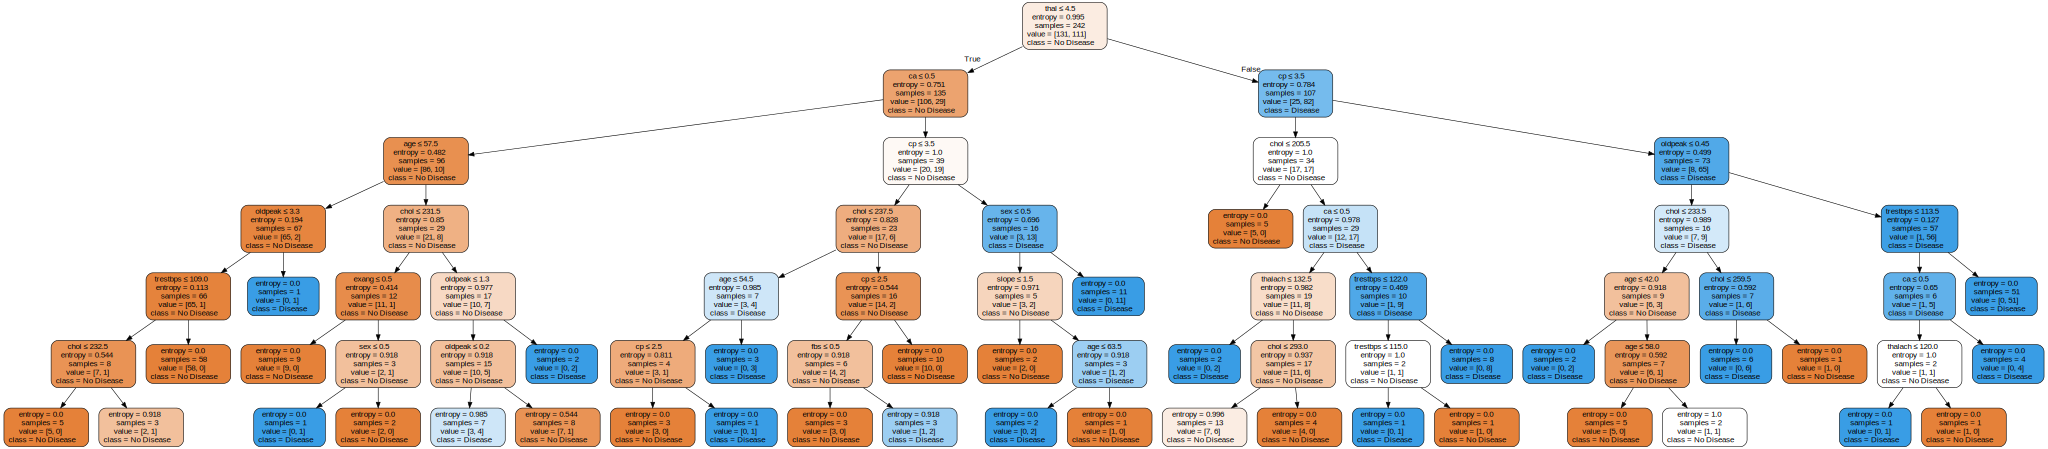

Max depth = 6, Accuracy = 0.7049

=== Decision Tree - Depth 7 ===


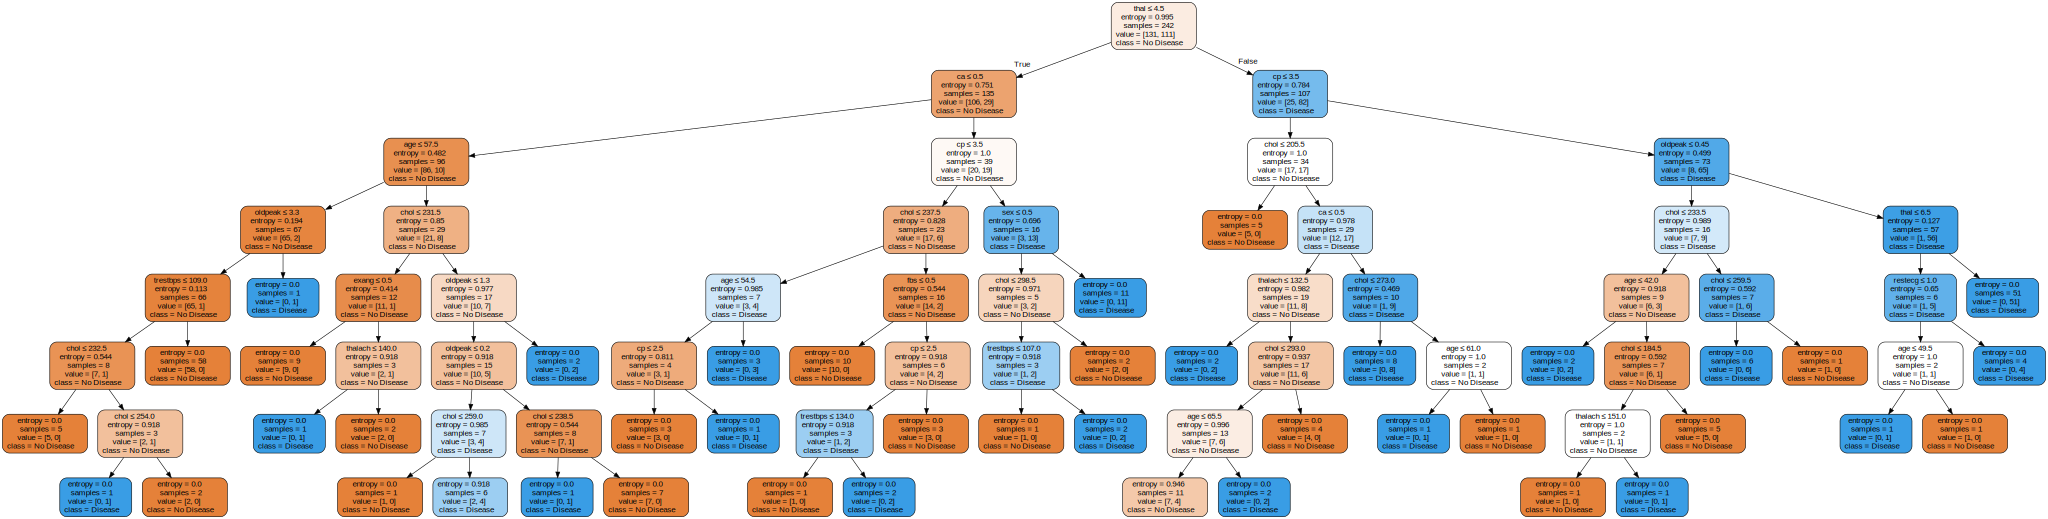

Max depth = 7, Accuracy = 0.6885

Max Depth | Test Accuracy
-------------------------
     None | 0.7705
        2 | 0.7705
        3 | 0.7869
        4 | 0.7869
        5 | 0.8033
        6 | 0.7049
        7 | 0.6885

=== Summary Table ===
max_depth  Accuracy
     None  0.770492
        2  0.770492
        3  0.786885
        4  0.786885
        5  0.803279
        6  0.704918
        7  0.688525


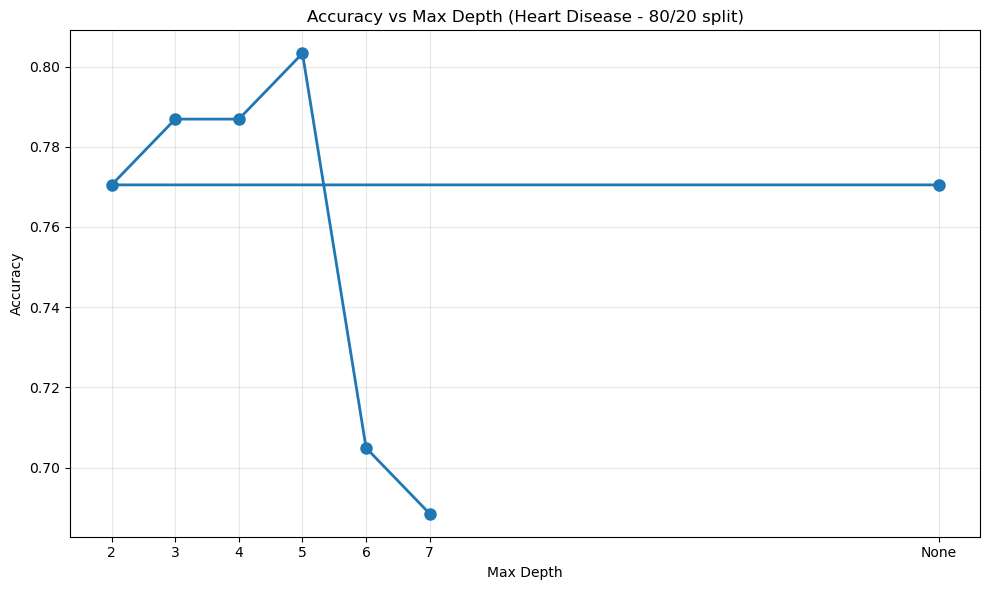

In [83]:
# Dữ liệu từ split 80/20
data_8020 = subsets['80/20']
X_train = data_8020['X_train']
y_train = data_8020['y_train']
X_test = data_8020['X_test']
y_test = data_8020['y_test']
feature_cols = X_train.columns.tolist()

# Danh sách độ sâu cần thử
depths = [None, 2, 3, 4, 5, 6, 7]
accuracy_results = {}

for d in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    
    # Dự đoán và tính độ chính xác
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[d] = acc
    
    # Vẽ cây bằng graphviz (toàn bộ cây, không giới hạn)
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_cols,
        class_names=['No Disease', 'Disease'],
        filled=True,
        rounded=True,
        special_characters=True,
        # Không giới hạn max_depth để vẽ toàn bộ cây
    )
    
    graph = graphviz.Source(dot_data)
    depth_name = "none" if d is None else str(d)
    
    # Hiển thị cây
    print(f"\n=== Decision Tree - Depth {depth_name} ===")
    display(graph)
    
    depth_label = 'None' if d is None else str(d)
    print(f"Max depth = {depth_label}, Accuracy = {acc:.4f}")

# Tổng hợp kết quả
print("\nMax Depth | Test Accuracy")
print("-------------------------")
for depth, acc in accuracy_results.items():
    depth_str = "None" if depth is None else str(depth)
    print(f"{depth_str:>9} | {acc:.4f}")

# Vẽ biểu đồ accuracy theo max_depth
depth_vals = list(accuracy_results.keys())
acc_vals = list(accuracy_results.values())
depth_labels = ['None' if d is None else str(d) for d in depth_vals]

# Tạo DataFrame để hiển thị bảng tóm tắt
df_results = pd.DataFrame({'max_depth': depth_labels, 'Accuracy': acc_vals})
print("\n=== Summary Table ===")
print(df_results.to_string(index=False))

# Vẽ biểu đồ Accuracy
depth_vals_plot = [15 if d is None else d for d in depth_vals]  # Dùng 15 để represent None

plt.figure(figsize=(10, 6))
plt.plot(depth_vals_plot, acc_vals, marker='o', linewidth=2, markersize=8)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth (Heart Disease - 80/20 split)')
plt.xticks(depth_vals_plot, labels=depth_labels)  # Gán nhãn đẹp
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Nhận xét: Max Depth cho Heart Disease 

Kết quả cho thấy độ chính xác trên tập kiểm tra đạt mức **cao nhất (80.33%)** khi `max_depth = 5`. Điều này cho thấy rằng:

- Khi độ sâu **quá nhỏ (2–3)**, mô hình chưa đủ khả năng biểu diễn tốt dữ liệu → _underfitting_, accuracy ~77.05%.
- Khi tăng đến **depth = 4–5**, mô hình học tốt hơn, accuracy tăng dần và đạt đỉnh tại **depth = 5**.
- Tuy nhiên, nếu tiếp tục tăng độ sâu **(6–7)**, độ chính xác **giảm đáng kể** (~70%) → dấu hiệu của _overfitting_.


**Kết luận:**
- `max_depth = 5` là lựa chọn hợp lý nhất, giúp mô hình đạt hiệu suất cao nhất, tránh overfitting, đồng thời vẫn giữ được độ phức tạp vừa phải cho việc triển khai và giải thích.
